In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame  

X = df_diabetes[['bmi']].values              
y = df_diabetes['target'].values.reshape(-1, 1)

X_train, X_test = X[:-20], X[-20:]
Y_train, Y_test = y[:-20], y[-20:]


In [8]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred_train = regressor.predict(X_train)
Y_pred_test  = regressor.predict(X_test)


In [9]:
print('Coeficiente (pendiente):', regressor.coef_.ravel()[0])
print('Intercepto:', regressor.intercept_.ravel()[0])

print('Mean squared error (test): %.2f' % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination R2 (test): %.2f' % r2_score(Y_test, Y_pred_test))


Coeficiente (pendiente): 938.2378612513519
Intercepto: 152.91886182616113
Mean squared error (test): 2548.07
Coefficient of determination R2 (test): 0.47


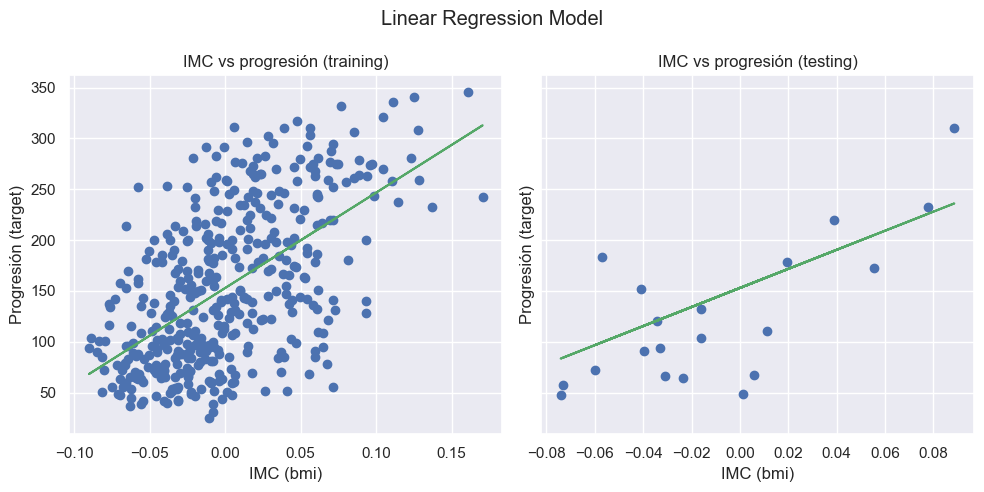

In [10]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Training
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, Y_pred_train, c='g')
ax[0].set_title('IMC vs progresión (training)')
ax[0].set_xlabel('IMC (bmi)')
ax[0].set_ylabel('Progresión (target)')

# Testeo
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_test, Y_pred_test, c='g')
ax[1].set_title('IMC vs progresión (testing)')
ax[1].set_xlabel('IMC (bmi)')
ax[1].set_ylabel('Progresión (target)')

plt.suptitle('Linear Regression Model')
plt.tight_layout()
plt.show()
